# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## >> Objective of Starbucks Capstone Project 

### What type of offers should starbucks create ?
### and which customers should they distribute to ?
### to make most amount of money $$



In short understanding demand and customer base

# 1. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import math
import json
import sys
import datetime
import matplotlib.pyplot as plt 

#% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Portfolio

In [2]:
#Having a glance at all the portfolio data. Small and easy !
#import sns
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


**portfolio**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [3]:
#Glancing at the data types
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


## Profile

In [4]:
#Profile dataset is compact. Lets see how is income distributed
profile.head(5)
#profile.info()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


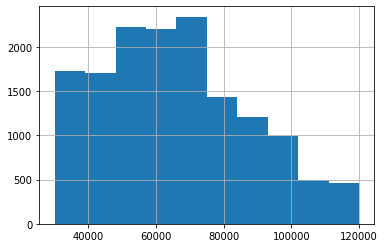

In [5]:
# Income is right skewed
profile['income'].hist();

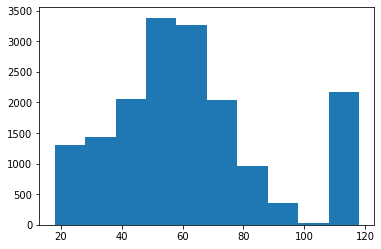

In [6]:
#Age is slightly right skewed and some outliers towards the right corner
plt.hist(profile['age'], bins=10);

In [7]:
profile['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

**profile**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [8]:
#Seems like gender and income have some null values
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


## Transcript

In [9]:
#Transcript dataset has all transactions to and by a customer
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [10]:
#Good that no value here is null
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


**transcript**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [11]:
#Understanding how often each event occurs in transcript
transcript.groupby('event').size()

event
offer completed     33579
offer received      76277
offer viewed        57725
transaction        138953
dtype: int64

## Summary

Portfolio :
1. Needs Splitting on channels
2. Difficulty, Duration and Reward must be normalized

Profile:
1. Income and Gender have null values which need to be handled

Transcript:
1. Offer and Transaction have to be seperated

# 2. Data Preparation

## 2a Creating a new Dataframe x

To check if there are significant users making transactions without receiving an offer we need to create a new dataframe with cross table

### Dataframe x below is a cross table showing each person with counts of
1. offer recieved
2. offer viewed
3. offer completed
4. transaction

In [12]:
x = transcript.groupby(['person','event'], as_index=False).size()
x = pd.crosstab(index=x['person'], values=x['size'], columns=x['event'], aggfunc=np.sum).round().reset_index()
x = x.fillna(0)
x['offer completed'] = x['offer completed'].astype(int)
x['offer received'] = x['offer received'].astype(int)
x['offer viewed'] = x['offer viewed'].astype(int)
x['transaction'] = x['transaction'].astype(int)
x.head(5)

event,person,offer completed,offer received,offer viewed,transaction
0,0009655768c64bdeb2e877511632db8f,3,5,4,8
1,00116118485d4dfda04fdbaba9a87b5c,0,2,2,3
2,0011e0d4e6b944f998e987f904e8c1e5,3,5,5,5
3,0020c2b971eb4e9188eac86d93036a77,3,5,3,8
4,0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12


In [13]:
#This means out of 17000 there are only 6 users who never recieved an offer but still made a transaction
x.loc[(x['offer received'] < 1) & (x['transaction'] > 0)]

event,person,offer completed,offer received,offer viewed,transaction
1231,12ede229379747bd8d74ccdc20097ca3,0,0,0,3
3857,3a4874d8f0ef42b9a1b72294902afea9,0,0,0,3
11707,ae8111e7e8cd4b60a8d35c42c1110555,0,0,0,5
13239,c6e579c6821c41d1a7a6a9cf936e91bb,0,0,0,4
14528,da7a7c0dcfcb41a8acc7864a53cf60fb,0,0,0,1
15648,eb540099db834cf59001f83a4561aef3,0,0,0,4


### Since only 6 users make transaction without receiving offer. We have to look if users actually view an offer when they make transactions

In [14]:
# Users Recieving Offers, but not Viewing them and still making a transaction 
x.loc[(x['offer received'] > 0) & (x['offer viewed'] < 1) & (x['transaction'] > 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 243 to 16895
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   person           150 non-null    object
 1   offer completed  150 non-null    int64 
 2   offer received   150 non-null    int64 
 3   offer viewed     150 non-null    int64 
 4   transaction      150 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ KB


In [15]:
#
x.loc[(x['offer completed'] == 1) & (x['offer received'] > 0) & (x['offer viewed'] > 0) & (x['transaction'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   person           0 non-null      object
 1   offer completed  0 non-null      int64 
 2   offer received   0 non-null      int64 
 3   offer viewed     0 non-null      int64 
 4   transaction      0 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 0.0+ bytes


In [16]:
#Sample
x.loc[(x['offer completed'] == 1) & (x['offer received'] > 0) & (x['offer viewed'] > 0) & (x['transaction'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   person           0 non-null      object
 1   offer completed  0 non-null      int64 
 2   offer received   0 non-null      int64 
 3   offer viewed     0 non-null      int64 
 4   transaction      0 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 0.0+ bytes


### There is nothing substancial to do any further analysis for this created cross table

## 2b. profile data processing

In [17]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [18]:
#renaming id to person
profile = profile.rename(columns={'id':'person'})

#checking if person column has duplicate values
boolean = not profile["person"].is_unique      # True (credit to @Carsten)
boolean = profile['person'].duplicated().any()
boolean

False

In [19]:
#changing type of columns
profile['age'] = profile['age'].astype(int)

In [20]:
profile = profile.reindex(columns=['person', 'age', 'gender', 'became_member_on', 'income'])

In [21]:
profile.head(2)

,person,age,gender,became_member_on,income
0,68be06ca386d4c31939f3a4f0e3dd783,118,None,20170212,NaN
1,0610b486422d4921ae7d2bf64640c50b,55,F,20170715,112000.0


In [22]:
#Removing age 118 as it looks like some system error. I will be happy to live at that age though :=)
profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)

In [23]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   person            17000 non-null  object 
 1   age               14825 non-null  float64
 2   gender            14825 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 664.2+ KB


In [24]:
profile[['age','income']] = profile[['age','income']].astype(pd.Int64Dtype())

In [25]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')
profile['member_since'] = profile['became_member_on'].dt.year
profile['member_duration'] = datetime.datetime.today().date() - profile['became_member_on'].dt.date
profile['member_duration'] = profile['member_duration'].dt.days

In [26]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person            17000 non-null  object        
 1   age               14825 non-null  Int64         
 2   gender            14825 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  Int64         
 5   member_since      17000 non-null  int64         
 6   member_duration   17000 non-null  int64         
dtypes: Int64(2), datetime64[ns](1), int64(2), object(2)
memory usage: 963.0+ KB


In [27]:
profile.head(5)

,person,age,gender,became_member_on,income,member_since,member_duration
0,68be06ca386d4c31939f3a4f0e3dd783,<NA>,None,2017-02-12,<NA>,2017,1797
1,0610b486422d4921ae7d2bf64640c50b,55,F,2017-07-15,112000,2017,1644
2,38fe809add3b4fcf9315a9694bb96ff5,<NA>,None,2018-07-12,<NA>,2018,1282
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,2017-05-09,100000,2017,1711
4,a03223e636434f42ac4c3df47e8bac43,<NA>,None,2017-08-04,<NA>,2017,1624


## 2c. Portfolio dataframe processing

In [28]:
#Changing id to offer_id
portfolio = portfolio.rename(columns={'id':'offer_id'})

#Extracting channels into other columns as 0's and 1's
portfolio['channel_email'] = portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio['channel_mobile'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio['channel_social'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
portfolio['channel_web'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)

In [29]:
portfolio = portfolio.drop('channels', axis=1)
portfolio

,reward,difficulty,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


## 2d. transcript dataframe processing

In [30]:
# First we need to check what values are there in the value column
values = []
for idx, row in transcript.iterrows():
    for v in row['value']:
        if v in values:
            continue
        else:
            values.append(v)

In [31]:
values

['offer id', 'amount', 'offer_id', 'reward']

In [32]:
#create new columns with datatypes
transcript['offer_id'] = '' # str
transcript['amount'] = 0  # int
transcript['reward'] = 0  # int

In [33]:
for idx, row in transcript.iterrows():
    for v in row['value']:
        if v == 'offer_id' or v == 'offer id':
            transcript.at[idx, 'offer_id'] = row['value'][v]
        if v == 'amount':
            transcript.at[idx, 'amount'] = row['value'][v]
        if v == 'reward':
            transcript.at[idx, 'reward'] = row['value'][v]

In [34]:
# filling all the NaNs in the 'offer_id' column with 'N/A' values (i.e. Not Applicable)
transcript['offer_id'] = transcript['offer_id'].apply(lambda x: 'N/A' if x == '' else x)

In [35]:
# dropping the 'value' column 
transcript.drop('value', axis=1, inplace=True)

In [36]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [37]:
transcript.head(5)

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


## 2e - Joining Transcript to Profile and then to Portfolio

In [38]:
df_all = transcript.merge(profile, on='person', how='left')

In [39]:
df_all = df_all.merge(portfolio, on='offer_id', how='left')

In [40]:
#This is the final single table that will be used for all our analysis
df_all.head(5)

,person,event,time,offer_id,amount,reward_x,age,gender,became_member_on,income,member_since,member_duration,reward_y,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,75,F,2017-05-09,100000,2017,1711,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,<NA>,None,2017-08-04,<NA>,2017,1624,5.0,20.0,10.0,discount,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,68,M,2018-04-26,70000,2018,1359,2.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,<NA>,None,2017-09-25,<NA>,2017,1572,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,<NA>,None,2017-10-02,<NA>,2017,1565,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0


In [41]:
#Changing Float to Int datatypes of some columns where it makes sense
df_all[['difficulty', 'duration','channel_email','channel_mobile','channel_social','channel_web','reward_y']] = df_all[['difficulty', 'duration','channel_email','channel_mobile','channel_social','channel_web','reward_y']].astype(pd.Int64Dtype())

In [42]:
transcript.offer_id.unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837', 'N/A'], dtype=object)

In [43]:
df_all.head(5)

,person,event,time,offer_id,amount,reward_x,age,gender,became_member_on,income,member_since,member_duration,reward_y,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,75,F,2017-05-09,100000,2017,1711,5,5,7,bogo,1,1,0,1
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,<NA>,None,2017-08-04,<NA>,2017,1624,5,20,10,discount,1,0,0,1
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,68,M,2018-04-26,70000,2018,1359,2,10,7,discount,1,1,0,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,<NA>,None,2017-09-25,<NA>,2017,1572,2,10,10,discount,1,1,1,1
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,<NA>,None,2017-10-02,<NA>,2017,1565,10,10,5,bogo,1,1,1,1


In [44]:
#checking column types of merged table
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            306534 non-null  object        
 1   event             306534 non-null  object        
 2   time              306534 non-null  int64         
 3   offer_id          306534 non-null  object        
 4   amount            306534 non-null  int64         
 5   reward_x          306534 non-null  int64         
 6   age               272762 non-null  Int64         
 7   gender            272762 non-null  object        
 8   became_member_on  306534 non-null  datetime64[ns]
 9   income            272762 non-null  Int64         
 10  member_since      306534 non-null  int64         
 11  member_duration   306534 non-null  int64         
 12  reward_y          167581 non-null  Int64         
 13  difficulty        167581 non-null  Int64         
 14  dura

In [45]:
df_all['age_group'] = pd.cut(df_all['age'], bins=[17, 35, 55, 103],
                labels=['young-adulthood', 'middle-age', 'older-adulthood'])

In [46]:
df_all.income.describe()

count    272762.000000
mean      64337.000755
std       21243.762941
min       30000.000000
25%       48000.000000
50%       62000.000000
75%       78000.000000
max      120000.000000
Name: income, dtype: float64

In [47]:
df_all['income_group'] = pd.cut(df_all['income'], bins=[0, 48000, 78000, 120000],
                labels=['low', 'mid', 'high'])

In [48]:
df_all.head(5)

,person,event,time,offer_id,amount,reward_x,age,gender,became_member_on,income,...,reward_y,difficulty,duration,offer_type,channel_email,channel_mobile,channel_social,channel_web,age_group,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,75,F,2017-05-09,100000,...,5,5,7,bogo,1,1,0,1,older-adulthood,high
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,<NA>,None,2017-08-04,<NA>,...,5,20,10,discount,1,0,0,1,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0,68,M,2018-04-26,70000,...,2,10,7,discount,1,1,0,1,older-adulthood,mid
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,0,<NA>,None,2017-09-25,<NA>,...,2,10,10,discount,1,1,1,1,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,<NA>,None,2017-10-02,<NA>,...,10,10,5,bogo,1,1,1,1,NaN,NaN


# 3. Analysis

## 3a. Which age group views most offers on which channel

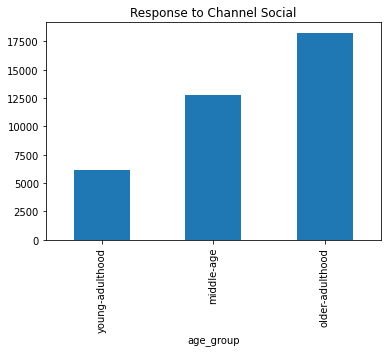

In [49]:
#Channel Social
count_vals = df_all[df_all['event'] == 'offer viewed'].groupby('age_group').sum('channel_social')['channel_social']

(count_vals[:10]).plot(kind="bar");
plt.title("Response to Channel Social");

### Women have overall a higher income than men

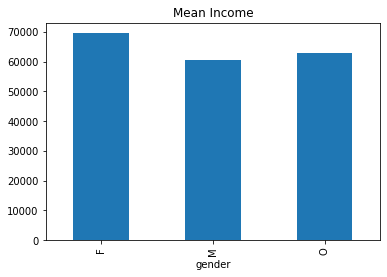

In [50]:
#Gender with Income Range
count_vals = df_all.groupby('gender').mean('income')['income']

(count_vals[:10]).plot(kind="bar");
plt.title("Mean Income");

## 3b. What Offer to send to which customer

In [51]:
# First taking a subset of combined data
df_all[['offer_id','event','age_group','income_group','gender','channel_email','channel_mobile','channel_social','channel_web']].head(5)

,offer_id,event,age_group,income_group,gender,channel_email,channel_mobile,channel_social,channel_web
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,older-adulthood,high,F,1,1,0,1
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,NaN,NaN,None,1,0,0,1
2,2906b810c7d4411798c6938adc9daaa5,offer received,older-adulthood,mid,M,1,1,0,1
3,fafdcd668e3743c1bb461111dcafc2a4,offer received,NaN,NaN,None,1,1,1,1
4,4d5c57ea9a6940dd891ad53e9dbe8da0,offer received,NaN,NaN,None,1,1,1,1


In [52]:
# To the core it seems since values are simulated its hard to form patterns anywhere 
# So probably using machine learning algorithms doesn't make sense as there is no bias

df_all[df_all['event'] == 'offer viewed'].groupby(['gender','offer_id']).sum()[['channel_email','channel_mobile','channel_social','channel_web']]

channel_email  channel_mobile  \
gender offer_id                                                          
F      0b1e1539f2cc45b7b9fa7c272da2e1d7            982               0   
       2298d6c36e964ae4a3e7e9706d1fb8c2           2614            2614   
       2906b810c7d4411798c6938adc9daaa5           1529            1529   
       3f207df678b143eea3cee63160fa8bed           1515            1515   
       4d5c57ea9a6940dd891ad53e9dbe8da0           2623            2623   
       5a8bc65990b245e5a138643cd4eb9837           2395            2395   
       9b98b8c7a33c4b65b9aebfe6a799e6d9           1544            1544   
       ae264e3637204a6fb9bb56bc8210ddfd           2364            2364   
       f19421c1d4aa40978ebb69ca19b0e20d           2612            2612   
       fafdcd668e3743c1bb461111dcafc2a4           2608            2608   
M      0b1e1539f2cc45b7b9fa7c272da2e1d7           1179               0   
       2298d6c36e964ae4a3e7e9706d1fb8c2           3675            3675   
       2906b810c7d4411798c6938adc9daaa5           1866            1866   
       3f207df678b143eea3cee63160fa8bed           1902            1902   
       4d5c57ea9a6940dd891ad53e9dbe8da0           3635            3635   
       5a8bc65990b245e5a138643cd4eb9837           3387            3387   
       9b98b8c7a33c4b65b9aebfe6a799e6d9           1879            1879   
       ae264e3637204a6fb9bb56bc8210ddfd           3454            3454   
       f19421c1d4aa40978ebb69ca19b0e20d           3613            3613   
       fafdcd668e3743c1bb461111dcafc2a4           3711            3711   
O      0b1e1539f2cc45b7b9fa7c272da2e1d7             54               0   
       2298d6c36e964ae4a3e7e9706d1fb8c2             90              90   
       2906b810c7d4411798c6938adc9daaa5             65              65   
       3f207df678b143eea3cee63160fa8bed             70              70   
       4d5c57ea9a6940dd891ad53e9dbe8da0             71              71   
       5a8bc65990b245e5a138643cd4eb9837             91              91   
       9b98b8c7a33c4b65b9aebfe6a799e6d9             76              76   
       ae264e3637204a6fb9bb56bc8210ddfd             83              83   
       f19421c1d4aa40978ebb69ca19b0e20d             85              85   
       fafdcd668e3743c1bb461111dcafc2a4             88              88   

                                         channel_social  channel_web  
gender offer_id                                                       
F      0b1e1539f2cc45b7b9fa7c272da2e1d7               0          982  
       2298d6c36e964ae4a3e7e9706d1fb8c2            2614         2614  
       2906b810c7d4411798c6938adc9daaa5               0         1529  
       3f207df678b143eea3cee63160fa8bed               0         1515  
       4d5c57ea9a6940dd891ad53e9dbe8da0            2623         2623  
       5a8bc65990b245e5a138643cd4eb9837            2395            0  
       9b98b8c7a33c4b65b9aebfe6a799e6d9               0         1544  
       ae264e3637204a6fb9bb56bc8210ddfd            2364            0  
       f19421c1d4aa40978ebb69ca19b0e20d            2612         2612  
       fafdcd668e3743c1bb461111dcafc2a4            2608         2608  
M      0b1e1539f2cc45b7b9fa7c272da2e1d7               0         1179  
       2298d6c36e964ae4a3e7e9706d1fb8c2            3675         3675  
       2906b810c7d4411798c6938adc9daaa5               0         1866  
       3f207df678b143eea3cee63160fa8bed               0         1902  
       4d5c57ea9a6940dd891ad53e9dbe8da0            3635         3635  
       5a8bc65990b245e5a138643cd4eb9837            3387            0  
       9b98b8c7a33c4b65b9aebfe6a799e6d9               0         1879  
       ae264e3637204a6fb9bb56bc8210ddfd            3454            0  
       f19421c1d4aa40978ebb69ca19b0e20d            3613         3613  
       fafdcd668e3743c1bb461111dcafc2a4            3711         3711  
O      0b1e1539f2cc45b7b9fa7c272da2e1d7               0           54  
       2298d6c36e964ae4a3e7e9706d1fb8c2

### Since we cannot differenciate on channels lets try another feature

In [53]:
# Women have higher income than men
df_all.groupby(['gender','income_group']).size()

gender  income_group
F       low             20967
        mid             54448
        high            37686
M       low             47570
        mid             81059
        high            27061
O       low               973
        mid              2023
        high              975
dtype: int64

In [54]:
# Most of the transaction money comes from older adult groups
df_all[df_all['event'] == 'transaction'].groupby(['gender','income_group','age_group']).sum()['amount']

gender  income_group  age_group      
F       low           young-adulthood     26989
                      middle-age          24535
                      older-adulthood     35137
        mid           young-adulthood     51562
                      middle-age         132450
                      older-adulthood    183746
        high          young-adulthood         0
                      middle-age         115130
                      older-adulthood    269738
M       low           young-adulthood     44782
                      middle-age          43693
                      older-adulthood     44301
        mid           young-adulthood     65726
                      middle-age         156438
                      older-adulthood    176591
        high          young-adulthood         0
                      middle-age          90860
                      older-adulthood    186769
O       low           young-adulthood       948
                      middle-age           1125
  

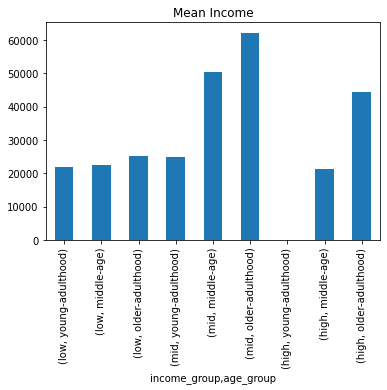

In [55]:
count_vals = df_all.groupby(['income_group','age_group']).size()

(count_vals[:10]).plot(kind="bar");
plt.title("Mean Income");

### Older Adulthood age group (56 and above) account for most of the high income group
### >> Let's focus on 'older-adulthood' age group and 'high' income group

In [56]:
df_all[(df_all['age_group'] == 'older-adulthood') & (df_all['income_group'] == 'high')].groupby(['offer_id','offer_type']).size().sort_values()

offer_id                          offer_type   
3f207df678b143eea3cee63160fa8bed  informational    1826
5a8bc65990b245e5a138643cd4eb9837  informational    2100
0b1e1539f2cc45b7b9fa7c272da2e1d7  discount         2599
9b98b8c7a33c4b65b9aebfe6a799e6d9  bogo             2670
2906b810c7d4411798c6938adc9daaa5  discount         2734
4d5c57ea9a6940dd891ad53e9dbe8da0  bogo             3060
ae264e3637204a6fb9bb56bc8210ddfd  bogo             3082
f19421c1d4aa40978ebb69ca19b0e20d  bogo             3163
2298d6c36e964ae4a3e7e9706d1fb8c2  discount         3299
fafdcd668e3743c1bb461111dcafc2a4  discount         3319
dtype: int64

### Bogo and Discount offer types are well recieved

### Lets see which channels older and high income people use

In [57]:
df_all[(df_all['age_group'] == 'older-adulthood') & 
       (df_all['income_group'] == 'high')].groupby(['offer_id','offer_type']).sum()[['channel_email','channel_mobile','channel_social','channel_web']]

,,channel_email,channel_mobile,channel_social,channel_web
offer_id,offer_type,,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,2599,0,0,2599
2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3299,3299,3299,3299
2906b810c7d4411798c6938adc9daaa5,discount,2734,2734,0,2734
3f207df678b143eea3cee63160fa8bed,informational,1826,1826,0,1826
4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,3060,3060,3060,3060
5a8bc65990b245e5a138643cd4eb9837,informational,2100,2100,2100,0
9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,2670,2670,0,2670
ae264e3637204a6fb9bb56bc8210ddfd,bogo,3082,3082,3082,0
f19421c1d4aa40978ebb69ca19b0e20d,bogo,3163,3163,3163,3163


### Channel Social and Channel Web are slightly less used than others

## >> Result <<

### Create more Discount and Bogo offer types to Older Adult population (56 and above) with high income (78000 and above) and distribute them on all the channels 